In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset("iris")

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Basic check:

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

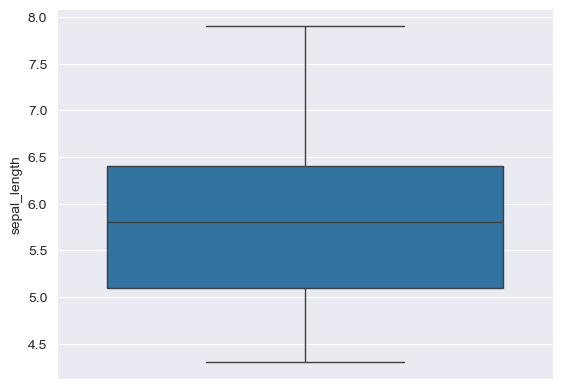

In [22]:
sns.boxplot(data.sepal_length)
plt.show()

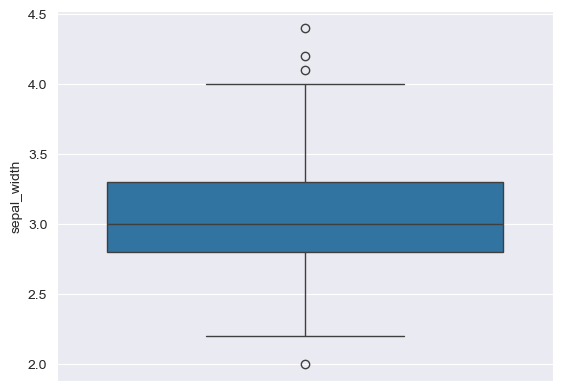

In [24]:
sns.boxplot(data.sepal_width)
plt.show()

In [26]:
q1 = data.sepal_width.quantile(0.25)
q3 = data.sepal_width.quantile(0.75)
iqr = q3 - q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [34]:
data.loc[data["sepal_width"] < lower_limit,"sepal_width"] = data.sepal_width.median()

In [32]:
data.sepal_width.median()

3.0

In [38]:
data.loc[data["sepal_width"] > upper_limit,"sepal_width"] =  data.sepal_width.median()

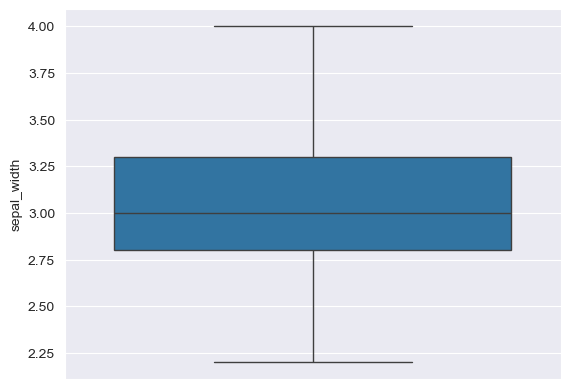

In [40]:
sns.boxplot(data.sepal_width)
plt.show()

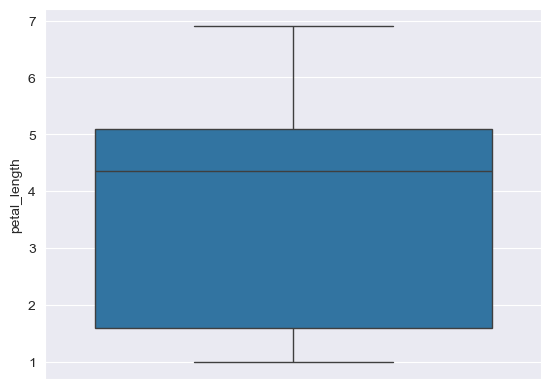

In [42]:
sns.boxplot(data.petal_length)
plt.show()

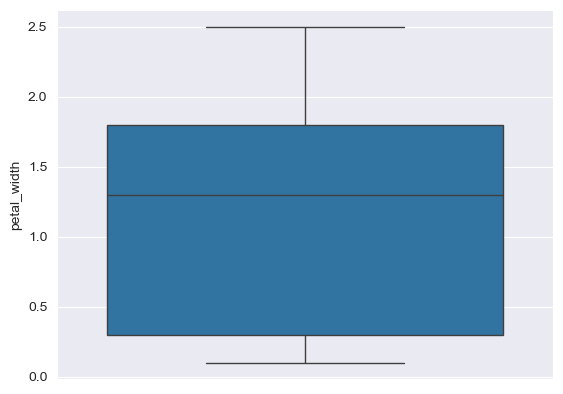

In [44]:
sns.boxplot(data.petal_width)
plt.show()

<Axes: >

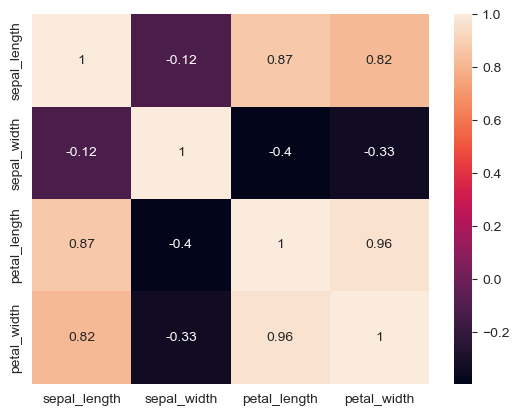

In [48]:
sns.heatmap(data.drop("species",axis = 1).corr(),annot=True)

# Model creation:-

In [80]:
from sklearn.preprocessing import LabelEncoder

In [82]:
encoder = LabelEncoder()

In [86]:
data["species"] = encoder.fit_transform(data["species"])

In [88]:
x = data[["sepal_length","sepal_width","petal_length","petal_width"]]
y = data.species

In [90]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

# Model selection:-

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=33)

In [112]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
94,5.6,2.7,4.2,1.3
86,6.7,3.1,4.7,1.5
121,5.6,2.8,4.9,2.0
115,6.4,3.2,5.3,2.3
140,6.7,3.1,5.6,2.4
...,...,...,...,...
57,4.9,2.4,3.3,1.0
146,6.3,2.5,5.0,1.9
66,5.6,3.0,4.5,1.5
135,7.7,3.0,6.1,2.3


In [114]:
len(y_train)

120

In [116]:
from sklearn.linear_model import LogisticRegression

In [118]:
LR = LogisticRegression()

In [122]:
LR.fit(x_train,y_train)

LogisticRegression()

In [124]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
94,5.6,2.7,4.2,1.3
86,6.7,3.1,4.7,1.5
121,5.6,2.8,4.9,2.0
115,6.4,3.2,5.3,2.3
140,6.7,3.1,5.6,2.4
...,...,...,...,...
57,4.9,2.4,3.3,1.0
146,6.3,2.5,5.0,1.9
66,5.6,3.0,4.5,1.5
135,7.7,3.0,6.1,2.3


In [126]:
y_test

96     1
65     1
29     0
54     1
134    2
100    2
24     0
17     0
137    2
120    2
143    2
38     0
136    2
63     1
141    2
74     1
138    2
27     0
56     1
125    2
9      0
18     0
104    2
12     0
119    2
126    2
91     1
71     1
147    2
149    2
Name: species, dtype: int32

In [128]:
y_predict = LR.predict(x_test)

In [130]:
y_predict

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 2])

In [132]:
y_test

96     1
65     1
29     0
54     1
134    2
100    2
24     0
17     0
137    2
120    2
143    2
38     0
136    2
63     1
141    2
74     1
138    2
27     0
56     1
125    2
9      0
18     0
104    2
12     0
119    2
126    2
91     1
71     1
147    2
149    2
Name: species, dtype: int32

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [140]:
confusion_matrix(y_predict,y_test)

array([[ 8,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 12]], dtype=int64)

In [142]:
accuracy_score(y_predict,y_test)

0.9333333333333333

In [150]:
f1_score(y_test,y_predict,average="weighted")

0.9344729344729344

In [152]:
precision_score(y_test,y_predict,average = "weighted")

0.9466666666666667

In [154]:
recall_score(y_test,y_predict,average = "weighted")

0.9333333333333333

In [156]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

